## FB data download and storing in graph

In [ ]:

!pip install networkx community

import networkx as nx
import community.community_louvain as community_louvain

# Download the Facebook dataset (replace with the correct URL if needed)
!wget https://snap.stanford.edu/data/facebook_combined.txt.gz
!gunzip facebook_combined.txt.gz

# Load the graph from the downloaded file
graph = nx.read_edgelist("facebook_combined.txt", create_using=nx.Graph(), nodetype=int)

# # Apply Louvain algorithm
# partition = community_louvain.best_partition(graph)

# # Print the detected communities and their members
# for community_id in set(partition.values()):
#     members = [node for node, comm in partition.items() if comm == community_id]
#     print(f"Community {community_id}: {members}")

# # You can also calculate modularity score
# modularity = community_louvain.modularity(partition, graph)
# print(f"Modularity: {modularity}")

--2024-10-19 15:22:22--  https://snap.stanford.edu/data/facebook_combined.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 218576 (213K) [application/x-gzip]
Saving to: ‘facebook_combined.txt.gz.1’

facebook_combined.t 100%[===================>] 213.45K   389KB/s    in 0.5s    

2024-10-19 15:22:23 (389 KB/s) - ‘facebook_combined.txt.gz.1’ saved [218576/218576]

gzip: facebook_combined.txt already exists; do you wish to overwrite (y or n)? y


## Detecting and Storing Communities

In [ ]:
# Load the graph from the downloaded file
graph = nx.read_edgelist("facebook_combined.txt", create_using=nx.Graph(), nodetype=int)

# Apply Louvain algorithm
partition = community_louvain.best_partition(graph)
communities = {}
# Print the detected communities and their members
for community_id in set(partition.values()):
    members = [node for node, comm in partition.items() if comm == community_id]
    print(f"Community {community_id}: {members}")
    communities[community_id] = members

# You can also calculate modularity score
modularity = community_louvain.modularity(partition, graph)
print(f"Modularity: {modularity}")

Community 0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 

## Downloading data to assign gender attributes to nodes

In [ ]:

import networkx as nx
import community.community_louvain as community_louvain
import pandas as pd
import os
import tarfile



# Download the Facebook dataset
!wget https://snap.stanford.edu/data/facebook.tar.gz

# Extract the tar.gz file
with tarfile.open("facebook.tar.gz", "r:gz") as tar:
    tar.extractall()




--2024-10-19 15:23:16--  https://snap.stanford.edu/data/facebook.tar.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 732104 (715K) [application/x-gzip]
Saving to: ‘facebook.tar.gz.2’

facebook.tar.gz.2   100%[===================>] 714.95K   740KB/s    in 1.0s    

2024-10-19 15:23:17 (740 KB/s) - ‘facebook.tar.gz.2’ saved [732104/732104]



In [ ]:

import os

folder_path = "facebook"  # Replace with the actual path to your folder
gender_features = []

for filename in os.listdir(folder_path):
  if filename.endswith(".featnames"):
    file_path = os.path.join(folder_path, filename)
    # print("node id: ", filename)
    with open(file_path, "r") as file:
      for line in file:
        if "gender" in line:
          gender_features.append({filename: line.strip()})

print("Lines containing 'gender' features:")
for feature in gender_features:
  print(feature)

Lines containing 'gender' features:
{'1684.featnames': '147 gender;anonymized feature 77'}
{'1684.featnames': '148 gender;anonymized feature 78'}
{'686.featnames': '41 gender;anonymized feature 77'}
{'686.featnames': '42 gender;anonymized feature 78'}
{'414.featnames': '63 gender;anonymized feature 77'}
{'414.featnames': '64 gender;anonymized feature 78'}
{'3980.featnames': '19 gender;anonymized feature 77'}
{'3980.featnames': '20 gender;anonymized feature 78'}
{'0.featnames': '77 gender;anonymized feature 77'}
{'0.featnames': '78 gender;anonymized feature 78'}
{'107.featnames': '264 gender;anonymized feature 77'}
{'107.featnames': '265 gender;anonymized feature 78'}
{'698.featnames': '26 gender;anonymized feature 77'}
{'698.featnames': '27 gender;anonymized feature 78'}
{'348.featnames': '86 gender;anonymized feature 77'}
{'348.featnames': '87 gender;anonymized feature 78'}
{'3437.featnames': '117 gender;anonymized feature 77'}
{'3437.featnames': '118 gender;anonymized feature 78'}
{'

In [ ]:

import pandas as pd
import os
nodeid_genderix = [(0,77),(1684,147),(1912,259),(414,63),\
 (3437,117),(348,86),(107,264),(3980,19),(686,41),(698,26)]
folder_path = "facebook"
node_gender = {}
for (nodeid,gender_index) in nodeid_genderix:
  nodeid = str(nodeid)
  fname = nodeid + ".feat"
  # gender_index = 27
  print("node id : ",nodeid)
  for filename in os.listdir(folder_path):
    if filename==fname:
      file_path = os.path.join(folder_path, filename)
      df = pd.read_csv(file_path, sep=" ", header=None)
      # print(df.head())
      tempD = pd.Series(df.iloc[:,gender_index+1].values,index=df.iloc[:,0]).to_dict()
      node_gender.update(tempD)

      print(df.shape)
      print(df.iloc[:,gender_index+1].sum()+df.iloc[:,gender_index+2].sum())
      df["opposite_gender"] = df[gender_index+1] + df[gender_index+2]
      print(df[df["opposite_gender"]!=1].shape)
      print("------"*10)



node id :  0
(347, 225)
341
(6, 226)
------------------------------------------------------------
node id :  1684
(792, 320)
776
(16, 321)
------------------------------------------------------------
node id :  1912
(755, 481)
746
(9, 482)
------------------------------------------------------------
node id :  414
(159, 106)
153
(6, 107)
------------------------------------------------------------
node id :  3437
(547, 263)
525
(22, 264)
------------------------------------------------------------
node id :  348
(227, 162)
224
(3, 163)
------------------------------------------------------------
node id :  107
(1045, 577)
1033
(12, 578)
------------------------------------------------------------
node id :  3980
(59, 43)
57
(2, 44)
------------------------------------------------------------
node id :  686
(170, 64)
162
(8, 65)
------------------------------------------------------------
node id :  698
(66, 49)
64
(2, 50)
------------------------------------------------------------


In [ ]:
len(node_gender)

4035

In [ ]:
node_gender.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

In [ ]:

import pandas as pd
import os
nodeid_genderix = [(0,77),(1684,147),(1912,259),(414,63),\
 (3437,117),(348,86),(107,264),(3980,19),(686,41),(698,26)]
folder_path = "/content/facebook"
# node_gender = {}
for (nodeid,genderix) in nodeid_genderix:
  nodeid = str(nodeid)
  fname = nodeid + ".egofeat"
  # gender_index = 27
  print("node id : ",nodeid)
  for filename in os.listdir(folder_path):
    if filename==fname:
      file_path = os.path.join(folder_path, filename)
      print("ego file path: ",file_path)
      df = pd.read_csv(file_path, sep=" ", header=None)
      # print(df.head())
      tempD = {int(nodeid): df.iloc[0,genderix]}
      print(df.shape)
      print(df.iloc[:,gender_index].sum()+df.iloc[:,gender_index+1].sum())
      df["opposite_gender"] = df[gender_index] + df[gender_index+1]
      print(df[df["opposite_gender"]!=1].shape)
      print("------"*10)
      if int(nodeid) in node_gender:
        continue
      else:
        node_gender.update(tempD)





node id :  0
ego file path:  /content/facebook/0.egofeat
(1, 224)
0
(1, 225)
------------------------------------------------------------
node id :  1684
ego file path:  /content/facebook/1684.egofeat
(1, 319)
0
(1, 320)
------------------------------------------------------------
node id :  1912
ego file path:  /content/facebook/1912.egofeat
(1, 480)
0
(1, 481)
------------------------------------------------------------
node id :  414
ego file path:  /content/facebook/414.egofeat
(1, 105)
0
(1, 106)
------------------------------------------------------------
node id :  3437
ego file path:  /content/facebook/3437.egofeat
(1, 262)
0
(1, 263)
------------------------------------------------------------
node id :  348
ego file path:  /content/facebook/348.egofeat
(1, 161)
0
(1, 162)
------------------------------------------------------------
node id :  107
ego file path:  /content/facebook/107.egofeat
(1, 576)
0
(1, 577)
------------------------------------------------------------
node

In [ ]:
len(node_gender)

4039

## f-Balance Cal

In [ ]:
## phi calc

In [ ]:
from collections import Counter

# Sample dictionary


# Count the occurrences of 0 and 1
counter = Counter(node_gender.values())

# Output the counts
print(f"Count of 0: {counter[0]}")
print(f"Count of 1: {counter[1]}")

Count of 0: 2507
Count of 1: 1532


In [ ]:
phi = (counter[0])/(counter[0]+counter[1])
print(phi)

0.6206981926219362


In [ ]:
## Balance Fairness

In [ ]:
# Sample dictionary
# node_dict = {
#     'node1': 0,
#     'node2': 1,
#     'node3': 0,
#     'node4': 1,
# }

# # List of node IDs
# Ci = ['node1', 'node2', 'node3', 'node4', 'node5']  # 'node5' is not in node_dict

def count_01(Ci, node_dict):

  # Initialize counters
  count_0 = 0
  count_1 = 0

  # Count values in Ci
  for node in Ci:
      if node in node_dict:
          if node_dict[node] == 0:
              count_0 += 1
          elif node_dict[node] == 1:
              count_1 += 1
  return count_0, count_1



In [ ]:
def fBal(r,c, phi):
  return (r)/(c) - phi

In [ ]:
community_scores = {}
for community in communities.keys():
  count_0, count_1 = count_01(communities[community], node_gender)
  print("Count of nodes with value 0:", count_0)
  print("Count of nodes with value 1:", count_1)
  fi = fBal(count_0,len(communities[community]),phi)
  fi = fBal(count_0,count_0+count_1,phi)
  community_scores[community] = fi
  print("fBal: ",fi)
  print("------"*10)


Count of nodes with value 0: 220
Count of nodes with value 1: 130
fBal:  0.007873235949492408
------------------------------------------------------------
Count of nodes with value 0: 310
Count of nodes with value 1: 120
fBal:  0.10023203993620333
------------------------------------------------------------
Count of nodes with value 0: 237
Count of nodes with value 1: 198
fBal:  -0.07587060641503962
------------------------------------------------------------
Count of nodes with value 0: 226
Count of nodes with value 1: 197
fBal:  -0.08641923281106145
------------------------------------------------------------
Count of nodes with value 0: 329
Count of nodes with value 1: 206
fBal:  -0.005744921593898722
------------------------------------------------------------
Count of nodes with value 0: 246
Count of nodes with value 1: 79
fBal:  0.13622488430114077
------------------------------------------------------------
Count of nodes with value 0: 10
Count of nodes with value 1: 9
fBal:  -0

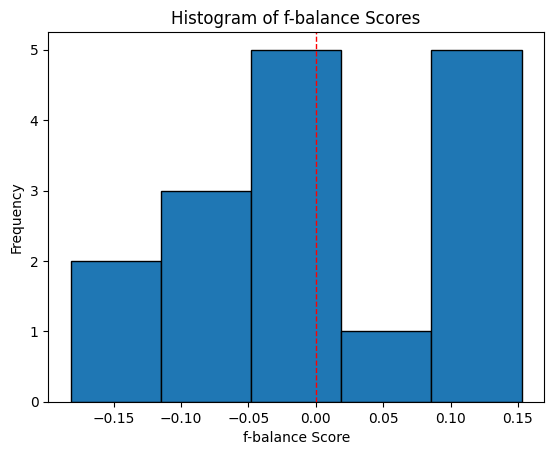

In [ ]:
import matplotlib.pyplot as plt

# Example dictionary
# community_scores = {
#     'community_1': 0.75,
#     'community_2': 0.85,
#     'community_3': 0.65,
#     'community_4': 0.90,
#     # Add more communities and their scores
# }

# Extract F scores
f_scores = list(community_scores.values())

# Plot histogram
plt.hist(f_scores, bins=5, edgecolor='black')
plt.axvline(0, color='red',linestyle='dashed',linewidth=1)
plt.xlabel('f-balance Score')
plt.ylabel('Frequency')
plt.title('Histogram of f-balance Scores')
plt.show()

In [ ]:
## Modularity score

## f-modularity score

In [ ]:
import networkx as nx

def calculate_modularity(graph, nodes):
    # Total number of edges in the graph
    m = graph.number_of_edges()

    Q = 0
    # Calculate Lc: number of intra-community edges
    Lc = sum(1 for u in nodes for v in nodes if graph.has_edge(u, v)) // 2

    # Calculate d: sum of degrees of nodes in the community
    d = sum(graph.degree(n) for n in nodes)

        # Update modularity Q
    if m > 0:  # Avoid division by zero
      Q = (Lc / m) - (d / (2 * m)) ** 2



    return Q

# Example usage
# Assume 'G' is your NetworkX graph and 'communities' is a list of sets or lists of nodes
# communities = [{node1, node2}, {node3, node4}, ...]

# Q = calculate_modularity(G, communities)

In [ ]:
def m_balance(m0, m1, m):
  return (m0-m1)/abs(m)

In [ ]:
def nodes_01(Ci, node_dict):

  # Initialize counters
  nodes_0 = []
  nodes_1 = []

  # Count values in Ci
  for node in Ci:
      if node in node_dict:
          if node_dict[node] == 0:
              nodes_0.append(node)
          elif node_dict[node] == 1:
              nodes_1.append(node)
  return nodes_0, nodes_1

In [ ]:
community_m_scores = {}
for community in communities.keys():
        # Nodes in the current community
        nodes = communities[community]
        nodes_0, nodes_1 = nodes_01(communities[community], node_gender)
        print("nodes with value 0:", nodes_0)
        print("nodes with value 1:", nodes_1)
        m0 = calculate_modularity(graph, nodes_0)
        m1 = calculate_modularity(graph, nodes_1)
        m = calculate_modularity(graph, nodes)
        print("m0: ",m0)
        print("m1: ",m1)
        print("m: ",m)
        mi = m_balance(m0, m1, m)
        community_m_scores[community] = mi
        print("fBal: ",mi)
        print("------"*10)


nodes with value 0: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 17, 19, 20, 22, 24, 25, 26, 27, 31, 33, 35, 38, 39, 40, 41, 42, 44, 46, 50, 54, 55, 57, 58, 63, 64, 65, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 82, 85, 87, 89, 91, 92, 93, 95, 97, 98, 100, 101, 102, 103, 105, 106, 108, 109, 112, 113, 115, 118, 119, 120, 121, 123, 124, 125, 127, 130, 132, 134, 137, 138, 139, 141, 143, 145, 146, 148, 151, 152, 153, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 168, 169, 170, 171, 172, 174, 175, 176, 180, 181, 184, 185, 187, 188, 189, 191, 192, 193, 195, 196, 197, 199, 200, 201, 202, 204, 206, 208, 209, 211, 212, 214, 215, 216, 218, 219, 220, 221, 224, 225, 226, 230, 232, 237, 238, 241, 242, 244, 247, 248, 249, 254, 255, 258, 259, 260, 261, 262, 263, 265, 266, 267, 268, 271, 272, 274, 275, 276, 277, 280, 281, 282, 283, 284, 285, 286, 288, 289, 290, 291, 293, 294, 295, 297, 299, 305, 306, 307, 308, 311, 312, 313, 314, 317, 318, 320, 321, 323, 324, 325, 326, 328, 329, 331, 332, 335, 339, 34

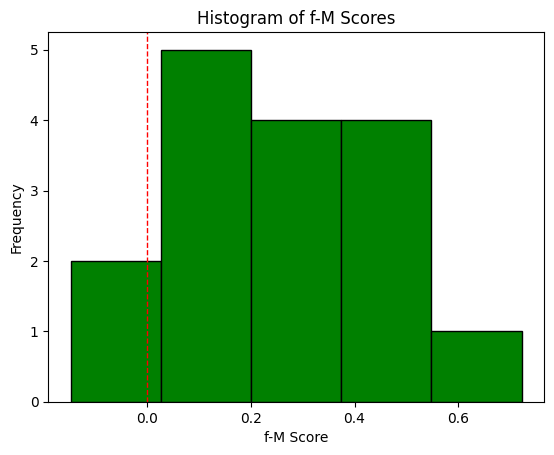

In [ ]:
import matplotlib.pyplot as plt

# Example dictionary
# community_scores = {
#     'community_1': 0.75,
#     'community_2': 0.85,
#     'community_3': 0.65,
#     'community_4': 0.90,
#     # Add more communities and their scores
# }

# Extract F scores
f_scores = list(community_m_scores.values())

# Plot histogram
plt.hist(f_scores, bins=5, edgecolor='black',color='green')
plt.axvline(0, color='red',linestyle='dashed',linewidth=1)
plt.xlabel('f-M Score')
plt.ylabel('Frequency')
plt.title('Histogram of f-M Scores')
plt.show()